In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import sys
sys.path.insert(1, '../scripts')
from preprocessors import Preprocessor
from sentiment_analyzer import SentimentAnalyzer as SA
from thematic_analyzer import ThematicAnalyzer as TA

/home/est-lul/Documents/Projects/customer-experience-analytics/.venv/lib64/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from tqdm import tqdm
tqdm.pandas()

In [4]:
df = pd.read_csv('../../data/Commercial_Bank_of_Ethiopia_reviews_with_language.csv')

In [4]:
df.shape
df.head()

,review_text,rating,date,bank_name,source,user_name,language
0,not functional,1,2025-06-05,Commercial Bank of Ethiopia,Google Play,kibru tebeka,en
1,everytime you uninstall the app you have to re...,1,2025-06-04,Commercial Bank of Ethiopia,Google Play,Abreham Shiferaw,en
2,አካውንት የምናስገባበት ቦታ ስም ጽፈን ነው ከዚህ በፊት የላክንባቸውን አ...,4,2025-06-04,Commercial Bank of Ethiopia,Google Play,Ibrahim Sultan,UNKNOWN
3,best,5,2025-06-04,Commercial Bank of Ethiopia,Google Play,oliyad werku,af
4,bezabih,5,2025-06-04,Commercial Bank of Ethiopia,Google Play,Aschalew Fereja,sl


In [5]:
preprocessor = Preprocessor()

In [ ]:

df['language'] = df['review_text'].progress_apply(preprocessor.detect_language)
df.head()

100%|██████████| 500/500 [09:53<00:00,  1.19s/it]


,review_text,rating,date,bank_name,source,user_name,language
0,not functional,1,2025-06-05,Commercial Bank of Ethiopia,Google Play,kibru tebeka,en
1,everytime you uninstall the app you have to re...,1,2025-06-04,Commercial Bank of Ethiopia,Google Play,Abreham Shiferaw,en
2,አካውንት የምናስገባበት ቦታ ስም ጽፈን ነው ከዚህ በፊት የላክንባቸውን አ...,4,2025-06-04,Commercial Bank of Ethiopia,Google Play,Ibrahim Sultan,UNKNOWN
3,best,5,2025-06-04,Commercial Bank of Ethiopia,Google Play,oliyad werku,af
4,bezabih,5,2025-06-04,Commercial Bank of Ethiopia,Google Play,Aschalew Fereja,sl


In [6]:
df = df[df['language'] != 'UNKNOWN'].copy()
print(df.shape)

(475, 7)


<Axes: title={'center': 'Rating Distribution'}, xlabel='rating'>

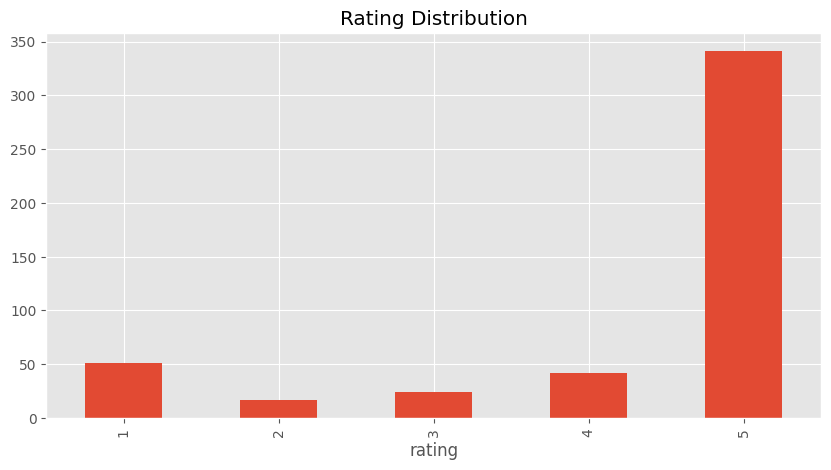

In [6]:
df['rating'].value_counts().sort_index().plot(kind='bar', title='Rating Distribution', figsize=(10, 5))

In [ ]:
# Apply preprocessing to the review text
df['processed_text'] = df['review_text'].progress_apply(preprocessor.preprocess_text)

100%|██████████| 475/475 [00:01<00:00, 237.65it/s]


In [10]:
df.head()

,review_text,rating,date,bank_name,source,user_name,language,processed_text
0,not functional,1,2025-06-05,Commercial Bank of Ethiopia,Google Play,kibru tebeka,en,functional
1,everytime you uninstall the app you have to re...,1,2025-06-04,Commercial Bank of Ethiopia,Google Play,Abreham Shiferaw,en,everytime uninstall app reach physically oldy ...
3,best,5,2025-06-04,Commercial Bank of Ethiopia,Google Play,oliyad werku,af,best
4,bezabih,5,2025-06-04,Commercial Bank of Ethiopia,Google Play,Aschalew Fereja,sl,bezabih
5,Best Mobile Banking app ever,5,2025-06-04,Commercial Bank of Ethiopia,Google Play,Kumsa Mergia,no,best mobile banking app ever


In [10]:
sa = SA()

In [ ]:
# Apply TextBlob sentiment analysis
df['textblob_sentiment'] = df['processed_text'].progress_apply(sa.get_textblob_sentiment)

# Display sentiment distribution
print(df['textblob_sentiment'].value_counts())

100%|██████████| 475/475 [00:00<00:00, 7629.66it/s]

textblob_sentiment
positive    336
neutral     113
negative     26
Name: count, dtype: int64


In [ ]:
# Apply VADER sentiment analysis
df['vader_sentiment'] = df['review_text'].progress_apply(sa.get_vader_sentiment)

# Display VADER sentiment distribution
print(df['vader_sentiment'].value_counts())

100%|██████████| 475/475 [00:01<00:00, 270.23it/s]

vader_sentiment
positive    338
neutral     104
negative     33
Name: count, dtype: int64


In [ ]:
# Apply DistilBERT sentiment analysis
df['distilbert_sentiment'] = df['review_text'].progress_apply(sa.get_distilbert_sentiment)

# Display DistilBERT sentiment distribution
print(df['distilbert_sentiment'].value_counts())

100%|██████████| 475/475 [00:10<00:00, 46.66it/s]

distilbert_sentiment
POSITIVE    345
NEGATIVE    130
Name: count, dtype: int64


In [39]:
df.sample(10)

,review_text,rating,date,bank_name,source,user_name,language,processed_text,textblob_sentiment,vader_sentiment,distilbert_sentiment
428,interesting,3,2025-03-30,Commercial Bank of Ethiopia,Google Play,Mudesir Muhammed,en,interesting,positive,positive,POSITIVE
196,it's the best app i,5,2025-05-02,Commercial Bank of Ethiopia,Google Play,Beza Sibhatu,en,best app,positive,positive,POSITIVE
413,Great version,5,2025-03-31,Commercial Bank of Ethiopia,Google Play,Mezgebu Belsty,en,great version,positive,positive,POSITIVE
264,Can't scan/recognize other banks' Interoperabl...,1,2025-04-13,Commercial Bank of Ethiopia,Google Play,Addis Tadesse,en,ca bank interoperable qr code,neutral,neutral,NEGATIVE
454,I am not exaggerating when I say that this app...,5,2025-03-29,Commercial Bank of Ethiopia,Google Play,Tamrat Abrham,en,exaggerating say application one biggest playe...,negative,negative,NEGATIVE
433,great,5,2025-03-30,Commercial Bank of Ethiopia,Google Play,Alemayehu Engida,ro,great,positive,positive,POSITIVE
295,easy and reliable,2,2025-04-08,Commercial Bank of Ethiopia,Google Play,abebaw alamirew,en,easy reliable,positive,positive,POSITIVE
297,it is Very Useful app 👍,5,2025-04-07,Commercial Bank of Ethiopia,Google Play,Shoisa Tadele,en,useful app,positive,positive,POSITIVE
410,good job,5,2025-03-31,Commercial Bank of Ethiopia,Google Play,Ayalnesh Duressa,so,good job,positive,positive,POSITIVE
120,well satisfied with this beautiful app,5,2025-05-18,Commercial Bank of Ethiopia,Google Play,Tsigereda Tadesse,en,well satisfied beautiful app,positive,positive,POSITIVE


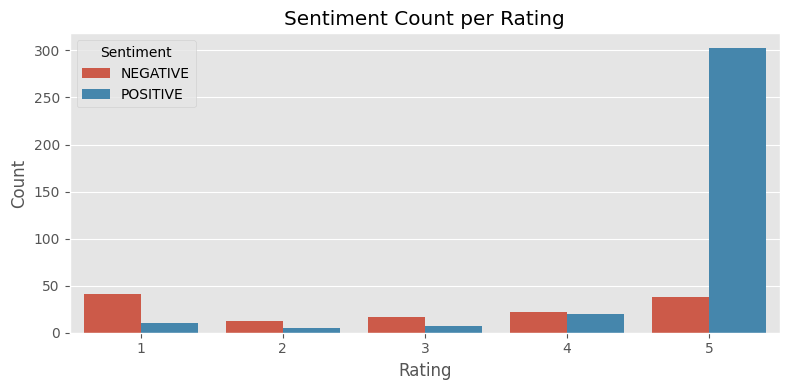

In [14]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='rating', hue='distilbert_sentiment')
plt.title('Sentiment Count per Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

In [ ]:
ta = TA()
# Get top keywords
keywords = ta.get_keywords(df['processed_text'])
print("Top keywords:", keywords)

Top keywords: ['2025' 'access' 'account' 'add' 'allow' 'amazing' 'app' 'app ever'
 'application' 'apps' 'back' 'bad' 'bank' 'banking' 'banking app' 'best'
 'best app' 'better' 'ca' 'cbe' 'cbe app' 'convenient' 'could' 'crash'
 'day' 'developer' 'developer option' 'doesnt' 'easy' 'easy use' 'even'
 'ever' 'every' 'excellent' 'experience' 'fantastic' 'fast' 'feature'
 'fix' 'good' 'good app' 'good application' 'great' 'great app' 'issue'
 'keep' 'life' 'like' 'love' 'make' 'many' 'mobile' 'mobile banking'
 'money' 'much' 'need' 'network' 'nice' 'nice app' 'ok' 'old' 'one'
 'option' 'please' 'problem' 'really' 'reason' 'reliable' 'say' 'screen'
 'screen shot' 'screenshot' 'screenshots' 'security' 'seen' 'send'
 'service' 'shot' 'simple' 'sometimes' 'system' 'take' 'thank' 'thing'
 'time' 'transaction' 'transfer' 'try' 'update' 'use' 'used' 'useful'
 'user' 'using' 'week' 'well' 'without' 'work' 'working' 'wow']


In [ ]:
bi_grams = ta.get_keywords(df['processed_text'], top_n=20, ngram_range=(2, 3))
print("Top N-Gram Keywords: ", bi_grams)

Top N-Gram Keywords:  ['app ever' 'bank statement' 'banking app' 'best app' 'bring back'
 'cbe app' 'developer option' 'easy use' 'ever seen' 'get money'
 'good app' 'good application' 'good job' 'great app' 'mobile banking'
 'mobile banking app' 'nice app' 'please fix' 'screen shot' 'useful app']


In [ ]:
positive_reviews = df[df['distilbert_sentiment'] == 'POSITIVE']['processed_text']
negative_reviews = df[df['distilbert_sentiment'] == 'NEGATIVE']['processed_text']

positive_keywords = ta.get_keywords(positive_reviews, top_n=10)
print("Top keywords in positive reviews:", positive_keywords)

negative_keywords = ta.get_keywords(negative_reviews, top_n=10)
print("Top keywords in negative reviews:", negative_keywords)

Top keywords in positive reviews: ['app' 'best' 'best app' 'cbe' 'easy' 'good' 'good app' 'great' 'like'
 'nice']
Top keywords in negative reviews: ['app' 'bank' 'banking' 'ca' 'cbe' 'good' 'make' 'mobile' 'need'
 'screenshot']


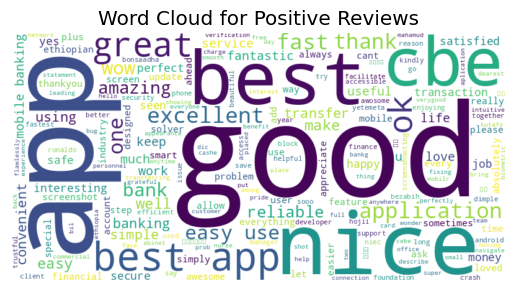

In [20]:
from wordcloud import WordCloud
# Word cloud for positive reviews
positive_text = ' '.join(positive_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()



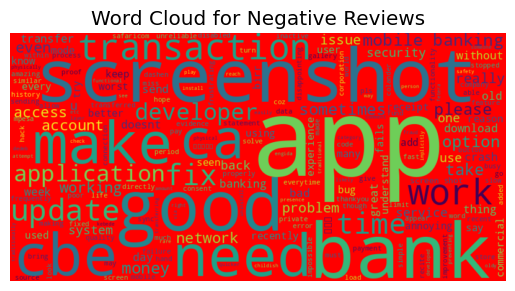

In [21]:
negative_text = ' '.join(negative_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='red').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

In [ ]:
df["themes"] = df["processed_text"].progress_apply(ta.assign_theme)
print(df[["review_text", "themes"]])

100%|██████████| 475/475 [00:00<00:00, 311441.99it/s]

                                           review_text            themes
0                                       not functional           [Other]
1    everytime you uninstall the app you have to re...  [User Interface]
3                                                 best           [Other]
4                                              bezabih           [Other]
5                         Best Mobile Banking app ever           [Other]
..                                                 ...               ...
495  it's a very good application but sometimes it ...           [Other]
496                                 commercial dank...           [Other]
497                                              great           [Other]
498                                     it's very good           [Other]
499                                   to getting money           [Other]

[475 rows x 2 columns]
